In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json
from matplotlib import cm

In [5]:
info = pd.read_csv(r"C:\Users\Bijan Emadi\Downloads\superhero_info - superhero_info.csv")
powers = pd.read_csv(r"C:\Users\Bijan Emadi\Downloads\superhero_powers - superhero_powers.csv")

In [6]:
info

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"
...,...,...,...,...,...,...,...,...
458,Yellowjacket|Marvel Comics,Male,Human,good,Blond,blue,Unknown,"{'Height': '183.0 cm', 'Weight': '83.0 kg'}"
459,Yellowjacket II|Marvel Comics,Female,Human,good,Strawberry Blond,blue,Unknown,"{'Height': '165.0 cm', 'Weight': '52.0 kg'}"
460,Yoda|George Lucas,Male,Yoda's species,good,White,brown,green,"{'Height': '66.0 cm', 'Weight': '17.0 kg'}"
461,Zatanna|DC Comics,Female,Human,good,Black,blue,Unknown,"{'Height': '170.0 cm', 'Weight': '57.0 kg'}"


In [7]:
powers

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."
...,...,...
662,Yellowjacket II,"Flight,Energy Blasts,Size Changing"
663,Ymir,"Cold Resistance,Durability,Longevity,Super Str..."
664,Yoda,"Agility,Stealth,Danger Sense,Marksmanship,Weap..."
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba..."


**Data Cleaning** 
- Separate the hero and publisher into two columns
- Separate height and weight from the measurements column
- One-hot encode every power in the powers dataset
- Combine the files into one DataFrame

In [8]:
# Separate the hero and publisher into two columns
info['Hero|Publisher'].str.split('|', expand=True)

,0,1
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Absorbing Man,Marvel Comics
...,...,...
458,Yellowjacket,Marvel Comics
459,Yellowjacket II,Marvel Comics
460,Yoda,George Lucas
461,Zatanna,DC Comics


In [9]:
info[['Hero_Name', 'Publisher']] = info['Hero|Publisher'].str.split('|', expand=True)
info.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero_Name,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [10]:
info = info.drop(columns=['Hero|Publisher'])
info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero_Name,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [11]:
# Separate height and weight from the Measurements column
to_replace = []
for char in to_replace:
    info['Measurements'] = info['Measurements'].str.replace(char,'',regex=False)
info['Measurements'].head()

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

In [12]:
meas = info.loc[0,"Measurements"]
print(type(meas))
meas

<class 'str'>


"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [13]:
meas = meas.replace("'",'"')
meas

'{"Height": "203.0 cm", "Weight": "441.0 kg"}'

In [14]:
fixed_meas = json.loads(meas)
print(type(fixed_meas))
fixed_meas

<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [15]:
info['Measurements'] = info['Measurements'].str.replace("'",'"')
info['Measurements'] = info['Measurements'].apply(json.loads)
info['Measurements'].head()

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

In [16]:
test_meas = info.loc[0,'Measurements']
print(type(test_meas))
test_meas

<class 'dict'>


{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [17]:
height_weight = info['Measurements'].apply(pd.Series)
height_weight

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [18]:
info = pd.concat((info, height_weight), axis = 1)
info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero_Name,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics,185.0 cm,90.0 kg
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics,203.0 cm,441.0 kg
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics,193.0 cm,122.0 kg


In [19]:
info = info.drop(columns=['Measurements'])

In [20]:
info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero_Name,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0 cm,90.0 kg
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0 cm,441.0 kg
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0 cm,122.0 kg


In [21]:
info=info.rename(columns={'Height':'Height (cm)','Weight':'Weight (kg)'})

In [22]:
info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero_Name,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0 cm,90.0 kg
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0 cm,441.0 kg
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0 cm,122.0 kg


In [23]:
info['Height (cm)'] = info['Height (cm)'].str.extract('(\d+)').astype(int)

In [24]:
info['Weight (kg)'] = info['Weight (kg)'].str.extract('(\d+)').astype(int)

In [25]:
info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero_Name,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203,441
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191,65
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185,90
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203,441
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193,122


In [26]:
# OHE Powers Column
powers.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [27]:
powers.loc[2,'Powers']

'Agility,Accelerated Healing,Cold Resistance,Durability,Underwater breathing,Marksmanship,Weapons Master,Longevity,Intelligence,Super Strength,Telepathy,Stamina,Immortality,Reflexes,Enhanced Sight,Sub-Mariner'

In [28]:
powers['Powers'].value_counts()

Intelligence                                                                                                                                                                                                                                                         8
Durability,Super Strength                                                                                                                                                                                                                                            5
Agility,Stealth,Marksmanship,Weapons Master,Stamina                                                                                                                                                                                                                  4
Marksmanship                                                                                                                                                                                                       

In [29]:
powers.loc[2,'Powers']

'Agility,Accelerated Healing,Cold Resistance,Durability,Underwater breathing,Marksmanship,Weapons Master,Longevity,Intelligence,Super Strength,Telepathy,Stamina,Immortality,Reflexes,Enhanced Sight,Sub-Mariner'

In [30]:
powers['Powers_split']=powers['Powers'].str.split(',')
powers.head()

,hero_names,Powers,Powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring]
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre..."


In [31]:
exploded = powers.explode('Powers_split')
exploded[['hero_names','Powers','Powers_split']]

,hero_names,Powers,Powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing
...,...,...,...
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba...",Weather Control
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Super Speed
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Intangibility
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Time Travel


In [32]:
cols_to_make = exploded['Powers_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [33]:
for col in cols_to_make:
    powers[col] = powers['Powers'].str.contains(col)
powers.head()

C:\Users\Bijan Emadi\anaconda\envs\dojo-env\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,hero_names,Powers,Powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
info.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero_Name,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203,441
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191,65
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185,90
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203,441
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193,122


In [35]:
powers.head()

,hero_names,Powers,Powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
# Merge the two tables

merged=pd.merge(info, powers, left_on='Hero_Name', right_on='hero_names')

In [37]:
merged.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero_Name,Publisher,Height (cm),Weight (kg),...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203,441,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191,65,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185,90,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203,441,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193,122,...,False,False,False,False,False,False,False,False,False,False


In [39]:
merged['Super Speed'].value_counts()

False    265
True     198
Name: Super Speed, dtype: int64

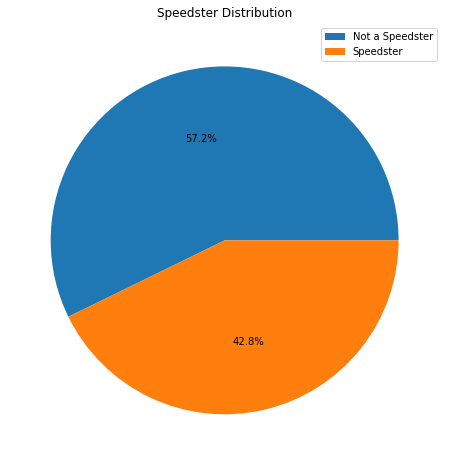

In [40]:
# Compare average weight of heroes who have super speed with those who dont

fig, ax = plt.subplots(figsize=(16,8))
ax.pie(x = merged['Super Speed'].value_counts(), autopct='%1.1f%%')
ax.set_title('Speedster Distribution')
ax.legend(['Not a Speedster','Speedster']);

42.8% of the heroes in our dataset have super speed

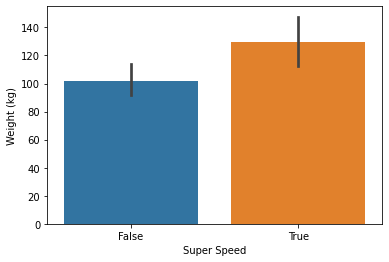

In [41]:
sns.barplot(x=merged["Super Speed"], y=merged["Weight (kg)"])

Speedsters are, on average, heavier than non-speedsters.

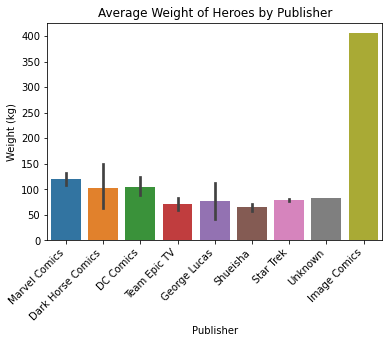

In [50]:
chart = sns.barplot(x=merged['Publisher'], y=merged['Weight (kg)'])
chart.set_title("Average Weight of Heroes by Publisher")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');

Most publishers have about the same average weight; except for Image Comics whose heroes are much heavier by far.